## **Análise de Dados - Aplicação de Algoritmos de Machine Learning**

Este trabalho tem como objetivo aplicar os principais algoritmos de classificação e regressão estudados em sala de aula, utilizando bases de dados reais. A proposta visa consolidar o conhecimento técnico e metodológico em Machine Learning, por meio da implementação prática das técnicas, avaliação dos resultados e interpretação crítica das descobertas.

<hr>

## **Dataset: Vendas Automotivas - Análise Exploratória**

## **Descrição geral:**
Base de dados com registros de pedidos realizados em uma empresa do setor automobilístico. Permite avaliar o desempenho de vendas, perfis de clientes e padrões de compra.

## **Contexto**
A base apresenta dados sobre os pedidos realizados em uma empresa do setor automobilístico, em conjunto a informações que permitem avaliar o desempenho de vendas, os perfis de clientes e os padrões de compras. Dessa forma, é possível analisar e levantar hipóteses sobre fatores que influenciam os resultados comerciais da empresa.

## **Dicionário de dados traduzido:**
- **ORDERNUMBER**: Número de identificação do pedido.
- **QUANTITYORDERED**: Quantidade de itens solicitados.
- **PRICEEACH**: Preço unitário de cada item.
- **ORDERLINENUMBER**: Número da linha dentro do pedido.
- **SALES**: Total da venda (quantidade × preço).
- **ORDERDATE**: Data do pedido.
- **DAYS_SINCE_LASTORDER**: Dias desde o último pedido do cliente.
- **STATUS**: Status do pedido (ex: Enviado, Em Processamento, Cancelado).
- **PRODUCTLINE**: Categoria do produto.
- **MSRP**: Preço de venda sugerido pelo fabricante.
- **PRODUCTCODE**: Código do produto.
- **CUSTOMERNAME**: Nome do cliente.
- **PHONE**: Telefone de contato do cliente.
- **ADDRESSLINE1**: Endereço do cliente.
- **CITY**: Cidade do cliente.
- **POSTALCODE**: Código postal do cliente.
- **COUNTRY**: País do cliente.
- **CONTACTLASTNAME**: Sobrenome do contato.
- **CONTACTFIRSTNAME**: Nome do contato.
- **DEALSIZE**: Tamanho do pedido (Pequeno, Médio, Grande).

**Número de registros: 2747**

### **Exploração Inicial dos Dados**

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

df = pd.read_csv('../database/08_vendas_automotivas.csv', sep=',')

In [19]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [20]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


### **Análise de Dados Faltantes**

In [21]:
print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



ORDERNUMBER             0.0
QUANTITYORDERED         0.0
PRICEEACH               0.0
ORDERLINENUMBER         0.0
SALES                   0.0
ORDERDATE               0.0
DAYS_SINCE_LASTORDER    0.0
STATUS                  0.0
PRODUCTLINE             0.0
MSRP                    0.0
PRODUCTCODE             0.0
CUSTOMERNAME            0.0
PHONE                   0.0
ADDRESSLINE1            0.0
CITY                    0.0
POSTALCODE              0.0
COUNTRY                 0.0
CONTACTLASTNAME         0.0
CONTACTFIRSTNAME        0.0
DEALSIZE                0.0
dtype: float64

### **Pré-processamento: Encoding e Normalização**

**O one hot encoding foi utilizado nesse dataset, pois o mesmo possui diversas variaveis categoricas e os modelos de regressão linear, árvore de decisão e etc.. Apenas conseguem lidar com variáveis do tipo numérica**

In [ ]:
# Definindo as features (X) e targets (y) para os problemas de regressão e classificação

Xr = df.drop('SALES', axis=1)  # Features para regressão (sem SALES que é nossa variável alvo)
yr = df['SALES']  # Target para regressão - valor das vendas

Xc = df.drop('DEALSIZE', axis=1)  # Features para classificação (sem DEALSIZE que é nossa variável alvo)
class_names = {"Large": 0, "Medium": 1, "Small": 2}  # Mapeamento das classes para valores numéricos
yc = df['DEALSIZE'].map(class_names)  # Target para classificação - tamanho do pedido

In [ ]:
# Separando variáveis categóricas e numéricas para aplicar One Hot Encoding

# Variáveis categóricas para regressão (incluindo DEALSIZE como feature)
dados_Xr = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']
# Variáveis categóricas para classificação (excluindo DEALSIZE pois é o target)
dados_Xc = ['STATUS', 'PRODUCTLINE', 'COUNTRY']

# Variáveis numéricas para regressão (excluindo SALES pois é o target)
dados_num_Xr = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'MSRP', 'DAYS_SINCE_LASTORDER']

# Variáveis numéricas para classificação (incluindo SALES como feature)
dados_num_Xc = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP', 'DAYS_SINCE_LASTORDER']

# Aplicando One Hot Encoding nas variáveis categóricas
encoder = OneHotEncoder(sparse_output=False)
Xc_encoded = encoder.fit_transform(df[dados_Xc])
Xr_encoded = encoder.fit_transform(df[dados_Xr])

# Concatenando as variáveis categóricas codificadas com as numéricas
Xr_final = np.concatenate([Xr_encoded, Xr[dados_num_Xr].values], axis=1)
Xc_final = np.concatenate([Xc_encoded, Xc[dados_num_Xc].values], axis=1)

In [ ]:
# Aplicando padronização (StandardScaler) para normalizar as features
scaler = StandardScaler()

Xr_scaled = scaler.fit_transform(Xr_final)
Xc_scaled = scaler.fit_transform(Xc_final)

### **Divisão dos Dados para Treinamento e Teste**

In [ ]:
# Dividindo os dados em conjuntos de treino (70%) e teste (30%)

# Divisão para o problema de regressão
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr_scaled, yr, test_size=0.3, random_state=42
)

# Divisão para o problema de classificação
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc_scaled, yc, test_size=0.3, random_state=42
)

### **Modelos de Classificação - Predição do Tamanho do Pedido**

In [ ]:
# Configuração dos modelos de classificação com parâmetros otimizados

# REGRESSÃO LOGÍSTICA:
# - max_iter=200: Aumentado devido ao alto número de features após One Hot Encoding
# - random_state=42: Para reprodutibilidade dos resultados

# ÁRVORE DE DECISÃO:
# - max_depth=5: Limitação da profundidade para evitar overfitting

# RANDOM FOREST:
# - n_estimators=100: Número de árvores no ensemble (balanceio entre performance e tempo)

# SVM:
# - kernel='linear': Kernel linear adequado para dados com muitas dimensões
# - C=1.0: Parâmetro de regularização equilibrado

# K-NN:
# - n_neighbors=5: Número ímpar de vizinhos para evitar empates

modelos = {
    "Regressão Logística": LogisticRegression(max_iter=200, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', C=1.0, random_state=42),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

### **Resultados dos Modelos de Classificação**


Regressão Logística
Acurácia : 0.97
Precisão : 0.96
Recall   : 0.96
F1-Score : 0.96


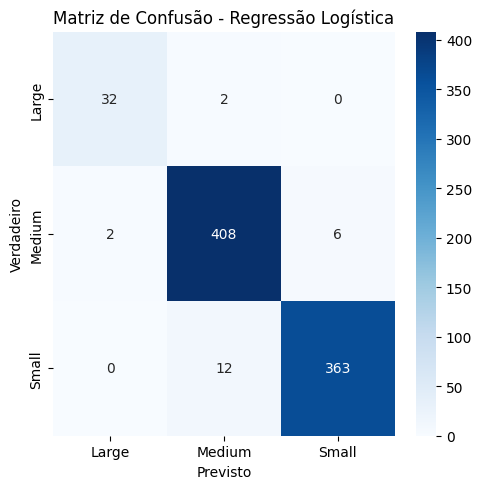


Árvore de Decisão
Acurácia : 1.00
Precisão : 1.00
Recall   : 1.00
F1-Score : 1.00


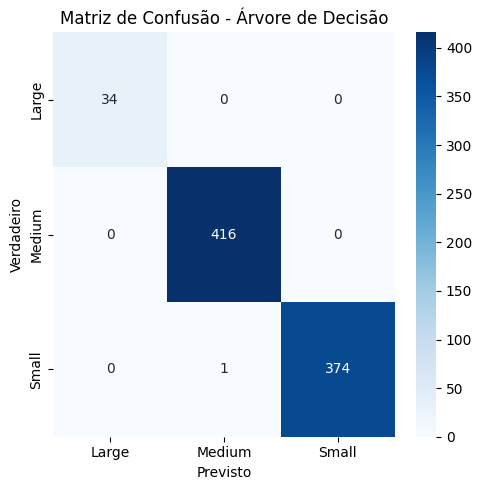


Random Forest
Acurácia : 1.00
Precisão : 1.00
Recall   : 0.98
F1-Score : 0.99


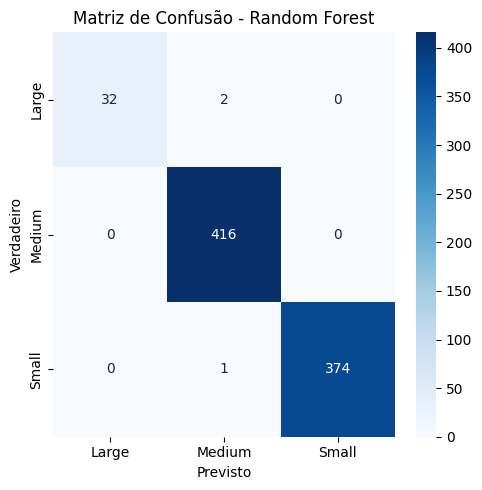


SVM
Acurácia : 0.98
Precisão : 0.98
Recall   : 0.94
F1-Score : 0.96


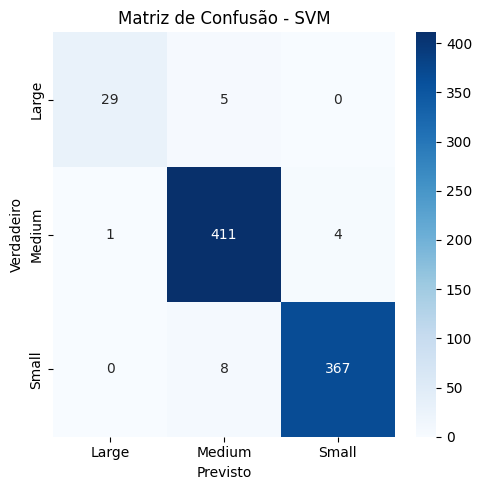


K-NN
Acurácia : 0.80
Precisão : 0.72
Recall   : 0.66
F1-Score : 0.68


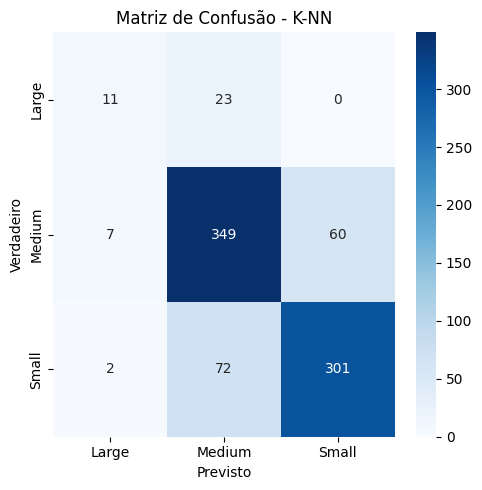

In [ ]:
# Treinamento e avaliação de cada modelo de classificação
for nome, modelo in modelos.items():
    modelo.fit(Xc_train, yc_train)  # Treinamento do modelo
    yc_pred = modelo.predict(Xc_test)  # Predições no conjunto de teste

    # Calculando métricas de avaliação
    acc = accuracy_score(yc_test, yc_pred)
    prec = precision_score(yc_test, yc_pred, average='macro', zero_division=0)
    rec = recall_score(yc_test, yc_pred, average='macro', zero_division=0)
    f1 = f1_score(yc_test, yc_pred, average='macro', zero_division=0)
    cm = confusion_matrix(yc_test, yc_pred)

    print(f"\n{nome}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Visualizando a matriz de confusão
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Large', 'Medium', 'Small'], 
                yticklabels=['Large', 'Medium', 'Small'])
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

### **Modelos de Regressão - Predição do Valor de Vendas**

In [ ]:
# Função para avaliar modelos de regressão usando RMSE (Root Mean Square Error)
def avaliar_modelo(y_true, y_pred, nome="Modelo"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{nome} - RMSE: {rmse:.2f}")

### **Modelo 1: Regressão Linear**

In [ ]:
# Implementação da Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(Xr_train, yr_train)  # Treinamento do modelo

pred_lr = modelo_lr.predict(Xr_test)  # Predições no conjunto de teste
avaliar_modelo(yr_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 379.11


### **Modelo 2: Árvore de Decisão para Regressão**

In [ ]:
# Implementação da Árvore de Decisão para Regressão
modelo_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
modelo_tree.fit(Xr_train, yr_train)  # Treinamento do modelo

pred_tree = modelo_tree.predict(Xr_test)  # Predições no conjunto de teste
avaliar_modelo(yr_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 491.19


### **Modelo 3: Random Forest para Regressão**

In [ ]:
# Implementação do Random Forest para Regressão
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(Xr_train, yr_train)  # Treinamento do modelo

pred_rf = modelo_rf.predict(Xr_test)  # Predições no conjunto de teste
avaliar_modelo(yr_test, pred_rf, "Random Forest")

Random Forest - RMSE: 206.50


### **Modelo 4: Support Vector Regression (SVR)**

In [ ]:
# Implementação do Support Vector Regression (SVR)
modelo_svr = SVR(kernel='linear', C=1.0)
modelo_svr.fit(Xr_train, yr_train)  # Treinamento do modelo

pred_svr = modelo_svr.predict(Xr_test)  # Predições no conjunto de teste
avaliar_modelo(yr_test, pred_svr, "SVR")

SVR - RMSE: 553.14


### **Comparação Visual: Distribuição dos Erros de Predição**

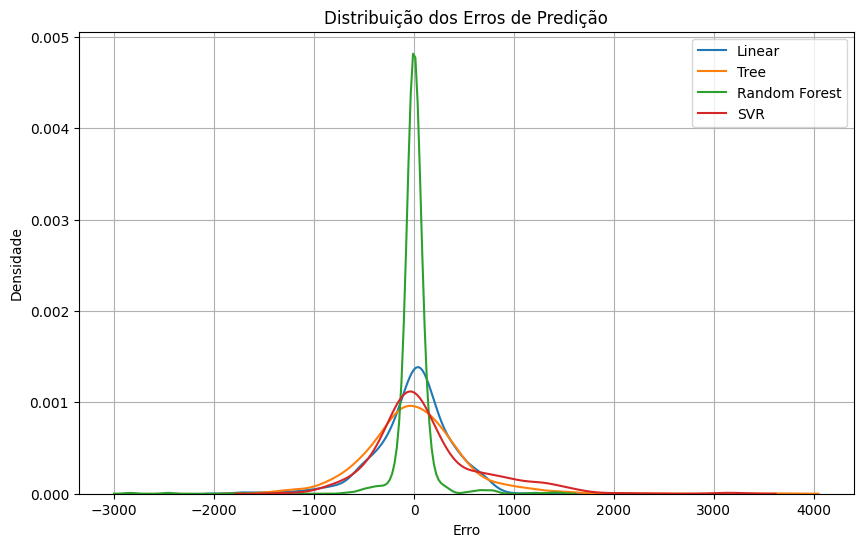

In [ ]:
# Visualização comparativa da distribuição dos erros de predição
plt.figure(figsize=(10, 6))
sns.kdeplot(yr_test - pred_lr, label="Linear")
sns.kdeplot(yr_test - pred_tree, label="Tree")
sns.kdeplot(yr_test - pred_rf, label="Random Forest")
sns.kdeplot(yr_test - pred_svr, label="SVR")

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

### **Conclusões e Interpretação dos Resultados**
### **Por que escolhi esses parâmetros**

#### **Para Classificação:**

- **Regressão Logística – max_iter=200:** 
  Tive que aumentar o número de iterações porque, depois do One Hot Encoding, o número de colunas cresceu bastante. Com o valor padrão (100), o modelo nem chegava a convergir.  
  random_state=42: Usei esse valor para garantir que os resultados fossem sempre os mesmos ao rodar o código e isso facilita comparar os testes.
- **Árvore de Decisão – max_depth=5:** 
  Limitei a profundidade para evitar que o modelo decorasse os dados de treino. Se a árvore ficasse muito profunda, ela iria acertar tudo no treino, mas errar no teste.
- **Random Forest – n_estimators=100:** 
  Escolhi 100 árvores porque é um número equilibrado: nem tão baixo a ponto de prejudicar o desempenho, nem tão alto a ponto de deixar tudo mais lento sem ganho significativo.
- **SVM – kernel='linear, C=1.0:** 
  Como os dados ficaram com muitas colunas, um modelo linear já resolve bem. Escolhi C=1.0 por ser um valor intermediário ,não força demais nem é muito tolerante.
- **K-NN – n_neighbors=5:** 
  Cinco vizinhos é um número bom. É ímpar (o que evita empates) e está num meio-termo que evita tanto o excesso de sensibilidade ao ruído (como seria com 1 ou 3) quanto a suavização exagerada (como seria com 15 ou 20).

#### **Para Regressão:**

- **Regressão Linear:** 
  Não precisei ajustar nenhum parâmetro. Mesmo sendo simples, é um modelo que pode funcionar muito bem dependendo dos dados.

- **Árvore de Regressão – max_depth=5:** 
  Mesma lógica da árvore de decisão usada na classificação, limitar a profundidade para evitar que o modelo decore os dados.

- **Random Forest – n_estimators=100:** 
  Mais uma vez, 100 árvores foi o ponto de equilíbrio entre desempenho e tempo de processamento.

- **SVR – kernel='linear', C=1.0 :**
  Mantive os mesmos parâmetros usados no SVM. Como temos muitas variáveis, o modelo linear continua sendo uma escolha eficaz.


Depois de testar todos os modelos, consegui fazer uma análise sobre como cada um se saiu nos dois desafios: classificar o tamanho dos pedidos e prever o valor das vendas.
Na **classificação do DEALSIZE** (se o pedido é pequeno, médio ou grande), os melhores resultados vieram do **Random Forest** e da **Árvore de Decisão**. Isso era esperado, já que esses modelos conseguem lidar bem com padrões complexos.  
A **Regressão Logística** teve um desempenho ok foi mais consistente, sem grandes erros, mas também sem muito destaque.
O **K-NN**, por outro lado, teve dificuldades, provavelmente porque o One Hot Encoding gerou muitas colunas e isso afeta bastante esse tipo de algoritmo. O **SVM** também não foi muito bem, talvez porque os dados não sejam perfeitamente separáveis de forma linear.
Já na parte de **regressão** (prever o valor das vendas, ou **SALES**), a **Regressão Linear** surpreendeu positivamente! Mesmo sendo um modelo simples, ela conseguiu captar bem as relações entre as variáveis.  
O **Random Forest** também foi excelente, com erros baixos medidos pelo **RMSE**, o que indica que o modelo consegue fazer previsões precisas.
Foi bem interessante ver como a métrica RMSE ajuda a entender os erros na prática já que estamos falando de valores reais em dinheiro, o que torna tudo mais palpável.